In [60]:
#Importation des bibliothèques et du CSV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

df_original = pd.read_csv('spam.csv', encoding="ISO-8859-1")
df_original.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Nettoyage

In [3]:
#Retrait des colonnes inutiles
df = df_original[['v1', 'v2']].copy()
df.rename(columns={"v1": "label", "v2": "content"}, inplace = True)
df.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print(df.label.value_counts(normalize = True))
#Proportion 'ham' : 4825/5572 = 86.6%

ham     0.865937
spam    0.134063
Name: label, dtype: float64


In [5]:
df.drop_duplicates(inplace = True)
#Retrait des lignes identiques 

print(df.label.value_counts(normalize = True))
#Proportion 'ham' : 4516/5169 = 87.4%
#Le Ratio ham/spam est donc conservé à 0.8% près après retrait des doublons.

df.describe()

ham     0.87367
spam    0.12633
Name: label, dtype: float64


,label,content
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [6]:
df.to_csv('spam_clean.csv',index = False)
#export du dataframe nettoyé dans le dossier de travail sous le nom de 'spam_clean.csv'

# Features

In [87]:
import re

In [7]:
df = pd.read_csv('spam_clean.csv')

In [94]:
#Ajout d'une feature length contenant le nombre de caractère compris dans le SMS
df['length'] = df['content'].apply(len)
df

,label,content,num_tel,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,1,161
5165,ham,Will Ì_ b going to esplanade fr home?,0,37
5166,ham,"Pity, * was in mood for that. So...any other s...",0,57
5167,ham,The guy did some bitching but I acted like i'd...,0,125


In [260]:
#Ajout d'une colonne num_tel contenant un booléen justifiant de la présence d'un numéro de téléphone dans le message
num_tel = []

for k in df.index:
    if len(re.findall("[0-9][0-9][0-9][0-9]",df['content'][k])) == 0:
        num_tel.append(0)
    else :
        num_tel.append(1)
num = pd.Series(num_tel)
df['num_tel'] = num
df

,label,content,num_tel,length,livre
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,0
1,ham,Ok lar... Joking wif u oni...,0,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,0
3,ham,U dun say so early hor... U c already then say...,0,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,0
...,...,...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,1,161,1
5165,ham,Will Ì_ b going to esplanade fr home?,0,37,0
5166,ham,"Pity, * was in mood for that. So...any other s...",0,57,0
5167,ham,The guy did some bitching but I acted like i'd...,0,125,0


In [261]:
livre = []

for k in df.index:
    if len(re.findall("£",df['content'][k])) == 0:
        livre.append(0)
    else :
        livre.append(1)
livre = pd.Series(livre)
df['livre'] = livre
df

,label,content,num_tel,length,livre
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,0
1,ham,Ok lar... Joking wif u oni...,0,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,0
3,ham,U dun say so early hor... U c already then say...,0,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,0
...,...,...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,1,161,1
5165,ham,Will Ì_ b going to esplanade fr home?,0,37,0
5166,ham,"Pity, * was in mood for that. So...any other s...",0,57,0
5167,ham,The guy did some bitching but I acted like i'd...,0,125,0


In [262]:
df.to_csv('spam_features.csv',index = False)

# Preprocessing

In [263]:
# data
import pandas as pd

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler


# Pipeline and model
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Score of models
from sklearn.metrics import accuracy_score

In [264]:
df = pd.read_csv('spam_features.csv')
print('\n\n Nombre de null :',df.content.isnull().sum())
df.head()



 Nombre de null : 0


,label,content,num_tel,length,livre
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,0
1,ham,Ok lar... Joking wif u oni...,0,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,0
3,ham,U dun say so early hor... U c already then say...,0,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,0


In [265]:
#Target preprocessing
lb_binar = LabelEncoder()
y = lb_binar.fit_transform(df.label)
type(y), y
# ham : 0, spam : 1

(numpy.ndarray, array([0, 0, 1, ..., 0, 0, 0]))

In [266]:
#Features preprocessing
X = df.drop(columns = 'label')
X.head()

,content,num_tel,length,livre
0,"Go until jurong point, crazy.. Available only ...",0,111,0
1,Ok lar... Joking wif u oni...,0,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,0
3,U dun say so early hor... U c already then say...,0,49,0
4,"Nah I don't think he goes to usf, he lives aro...",0,61,0


In [267]:
#Selection des features catégoriques
column_cat = df.select_dtypes(include=['object']).columns.drop(['content', 'label'])
print(column_cat)

#Pipeline de preprocessing des features numériques
transformer_cat = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')), #Imputation facultative car données complètes
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

Index([], dtype='object')


In [268]:
#Selection des features numériques
column_num = df.select_dtypes(include=['int','float']).columns
print(column_num)

#Pipeline de preprocessing des features numériques
transformer_num = Pipeline(steps = [
    ('imputation', SimpleImputer(strategy='median')), #Imputation facultative car données complètes
    ('scaling', MinMaxScaler())
])

Index(['num_tel', 'length', 'livre'], dtype='object')


In [269]:
#Features Columns Transformer
preparation = ColumnTransformer(transformers = [
    ('data_num', transformer_num, column_num), 
    ('data_cat', transformer_cat, column_cat)
])

In [301]:
#Création du modèle
model = DecisionTreeClassifier()
model2 = GaussianNB()

pipe_model = Pipeline(steps=[
    ('preparation', preparation),
    ('model', model)])

set_config(display = 'diagram')
pipe_model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['num_tel', 'length', 'livre'], dtype='object')),
                                                 ('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index([], dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [302]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1, stratify = y)
y_train, y_test, X_train, X_test

(array([0, 1, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 1]),
                                                 content  num_tel  length  \
 4939  K, fyi I'm back in my parents' place in south ...        0      97   
 4686  Ur cash-balance is currently 500 pounds - to m...        1     146   
 1226  Ok. No wahala. Just remember that a friend in ...        0      54   
 5029                                         East coast        0      10   
 380                      Mm that time you dont like fun        0      30   
 ...                                                 ...      ...     ...   
 2520  Sorry da thangam, very very sorry i am held up...        0      59   
 2736  Fuck cedar key and fuck her (come over anyway ...        0      50   
 2131  * Will have two more cartons off u and is very...        0      67   
 4807  I will come with karnan car. Please wait till ...        0      76   
 3555  Claim a 200 shopping spree, just call 08717895...        1      86   
 
       l

In [303]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['num_tel', 'length', 'livre'], dtype='object')),
                                                 ('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index([], dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [304]:
y_pred = pipe_model.predict(X_test)

# Score of models
score = accuracy_score(y_test, y_pred)
print("score :", round(score, 5))

score : 0.97292


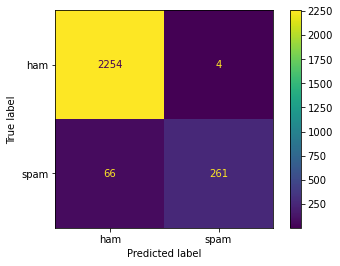

In [305]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ["ham", "spam"]).plot()

In [306]:
#Extraction des faux postifs et faux négatifs pour analyse
message = X_test.content.tolist() #Récupération de la liste des messages test
faux_positifs = []
faux_négatifs = []
for k in range(len(y_test)):
    if y_test[k] != y_pred[k]:
        if y_test[k] == 0:
            faux_positifs.append(message[k])
        else:
            faux_négatifs.append(message[k])
len(faux_positifs), faux_positifs, len(faux_négatifs),faux_négatifs

(4,
 ['staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323',
  'Leave it wif me lar... ÌÏ wan to carry meh so heavy... Is da num 98321561 familiar to Ì_?',
  "Hey next sun 1030 there's a basic yoga course... at bugis... We can go for that... Pilates intro next sat.... Tell me what time you r free",
  "Just got up. have to be out of the room very soon. \x89Û_. i hadn't put the clocks back til at 8 i shouted at everyone to get up and then realised it was 7. wahay. another hour in bed."],
 66,
 ['Win the newest åÒHarry Potter and the Order of the Phoenix (Book 5) reply HARRY, answer 5 questions - chance to be the first among readers!',
  'Dear Voucher Holder, To claim this weeks offer, at your PC please go to http://www.wtlp.co.uk/text. Ts&Cs apply.',
  'URGENT. Important information for 02 user. Today is your lucky day! 2 find out why , log onto http://www.urawinner.com there is a fantastic surprise awaiting you !',
  'XXXMobileMovieClub: To use your credit, click the WAP link in the next 